In [1]:
# Import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
file_path = "C:/Users/Asus/Downloads/seattle-weather.csv"
data = pd.read_csv(file_path)

In [3]:
# Data analysis and preprocessing
# Assuming 'date' column is present, convert it to datetime object
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])

In [4]:
# Extract features from the 'date' column (e.g., day of the week, month, etc.)
if 'date' in data.columns:
    data['day_of_week'] = data['date'].dt.dayofweek
    data['month'] = data['date'].dt.month

In [5]:
# Drop unnecessary columns
data = data.drop(['date'], axis=1)

In [6]:
# Display the preprocessed data
print("\nPreprocessed Data:")
print(data.head())


Preprocessed Data:
   precipitation  temp_max  temp_min  wind  weather  day_of_week  month
0            0.0      12.8       5.0   4.7  drizzle            6      1
1           10.9      10.6       2.8   4.5     rain            0      1
2            0.8      11.7       7.2   2.3     rain            1      1
3           20.3      12.2       5.6   4.7     rain            2      1
4            1.3       8.9       2.8   6.1     rain            3      1


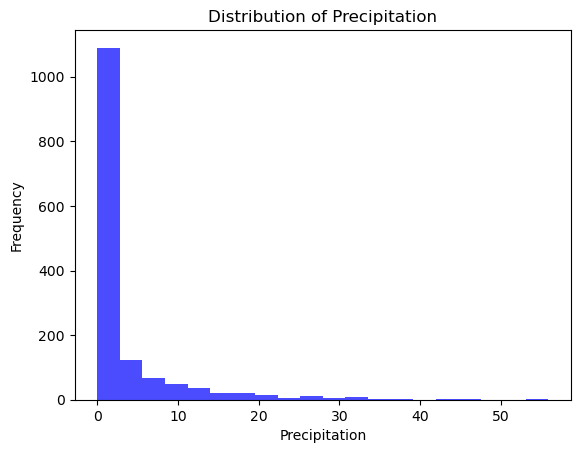

In [7]:
# Data Analysis Diagrams
# Histogram for precipitation
plt.hist(data['precipitation'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Select features and target variable
features = data.drop(['weather'], axis=1)
target = data['weather']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [10]:
# Initialize classifiers
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
lr_classifier = LogisticRegression()

In [11]:
# Initialize logistic regression with increased max_iter
lr_classifier = LogisticRegression(max_iter=1000) 

In [12]:
# Train the models
rf_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Evaluate the models
rf_predictions = rf_classifier.predict(X_test)
svm_predictions = svm_classifier.predict(X_test)
lr_predictions = lr_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")

Random Forest Accuracy: 0.8395904436860068
SVM Accuracy: 0.7747440273037542
Logistic Regression Accuracy: 0.8327645051194539


In [14]:
# Classification Report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions, zero_division=1))

# Classification Report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, svm_predictions, zero_division=1))

# Classification Report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, lr_predictions, zero_division=1))

Classification Report for Random Forest:
              precision    recall  f1-score   support

     drizzle       1.00      0.00      0.00         9
         fog       0.80      0.16      0.27        25
        rain       0.95      0.92      0.93       120
        snow       0.50      0.25      0.33         8
         sun       0.77      0.99      0.87       131

    accuracy                           0.84       293
   macro avg       0.80      0.46      0.48       293
weighted avg       0.85      0.84      0.80       293

Classification Report for SVM:
              precision    recall  f1-score   support

     drizzle       1.00      0.00      0.00         9
         fog       1.00      0.00      0.00        25
        rain       0.88      0.83      0.86       120
        snow       1.00      0.00      0.00         8
         sun       0.71      0.97      0.82       131

    accuracy                           0.77       293
   macro avg       0.92      0.36      0.34       293
weigh

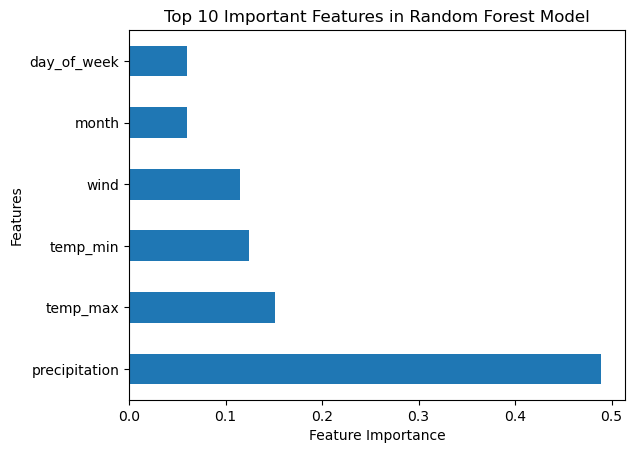

In [15]:
# Feature Importance Plot For Random Forest Classifier
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features in Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

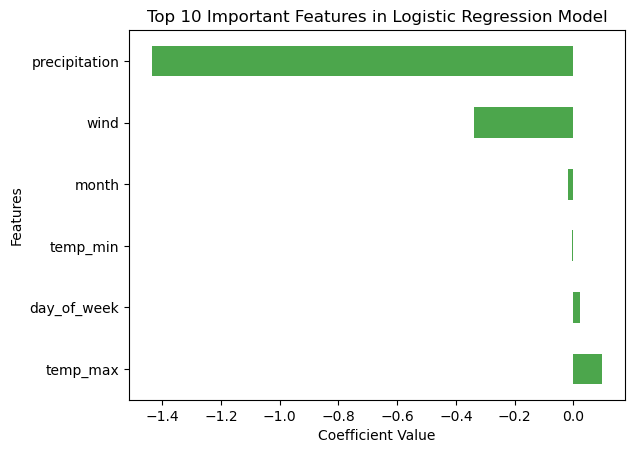

In [16]:
# Feature Importance Plot for Logistic Regression
coefficients = pd.Series(lr_classifier.coef_[0], index=X_train.columns)
coefficients.nlargest(10).plot(kind='barh', color='green', alpha=0.7)
plt.title('Top 10 Important Features in Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

In [17]:
# Feature Importance Plot for Support Vector Classifier (SVC)
if hasattr(svm_classifier, 'coef_'):
    coefficients_svm = pd.Series(svm_classifier.coef_[0], index=X_train.columns)
    coefficients_svm.nlargest(10).plot(kind='barh', color='red', alpha=0.7)
    plt.title('Top 10 Important Features in SVC Model')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.show()
else:
    print("SVC with linear kernel is required for feature importance plot.")

SVC with linear kernel is required for feature importance plot.


In [18]:
# Model tuning using GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [19]:
# Get the best parameters and retrain the Random Forest model
best_params_rf = grid_search_rf.best_params_
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)

In [20]:
# Evaluate the tuned Random Forest model
tuned_rf_predictions = best_rf_classifier.predict(X_test)
tuned_rf_accuracy = accuracy_score(y_test, tuned_rf_predictions)

In [21]:
print(f"Tuned Random Forest Accuracy: {tuned_rf_accuracy}")
print(f"Best Parameters for Random Forest:", best_params_rf)

Tuned Random Forest Accuracy: 0.8327645051194539
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [22]:
# Model tuning using GridSearchCV for Support Vector Classifier (SVC)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [23]:
# Get the best parameters and retrain the SVC model
best_params_svm = grid_search_svm.best_params_
best_svm_classifier = SVC(**best_params_svm)
best_svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [24]:
# Evaluate the tuned SVC model
tuned_svm_predictions = best_svm_classifier.predict(X_test)
tuned_svm_accuracy = accuracy_score(y_test, tuned_svm_predictions)

print(f"Tuned SVM Accuracy: {tuned_svm_accuracy}")
print(f"Best Parameters for SVM:", best_params_svm)

Tuned SVM Accuracy: 0.825938566552901
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [25]:
# Create a pipeline with scaling
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', LogisticRegression())
])

In [26]:
# Model tuning using GridSearchCV for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['liblinear'],
    'classifier__max_iter': [500, 1000, 2000]
}

grid_search_lr = GridSearchCV(estimator=lr_pipeline, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__max_iter': [500, 1000, 2000],
                         'classifier__solver': ['liblinear']})

In [27]:
# Get the best parameters and retrain the Logistic Regression model
best_params_lr = grid_search_lr.best_params_
best_lr_classifier = grid_search_lr.best_estimator_
best_lr_classifier.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=10, max_iter=500, solver='liblinear'))])

In [28]:
# Evaluate the tuned Logistic Regression model
tuned_lr_predictions = best_lr_classifier.predict(X_test)
tuned_lr_accuracy = accuracy_score(y_test, tuned_lr_predictions)

print(f"Tuned Logistic Regression Accuracy: {tuned_lr_accuracy}")
print(f"Best Parameters for Logistic Regression:", best_params_lr)

Tuned Logistic Regression Accuracy: 0.7849829351535836
Best Parameters for Logistic Regression: {'classifier__C': 10, 'classifier__max_iter': 500, 'classifier__solver': 'liblinear'}


In [29]:
# Print the classification report for the tuned Random Forest model
print("Classification Report for Tuned Random Forest:")
print(classification_report(y_test, tuned_rf_predictions, zero_division=1))
print(f"Tuned Random Forest Accuracy: {tuned_rf_accuracy}")
print(f"Best Parameters for Random Forest:", best_params_rf)
print("\n" + "="*50 + "\n")

# Print the classification report for the tuned SVC model
print("Classification Report for Tuned SVM:")
print(classification_report(y_test, tuned_svm_predictions, zero_division=1))
print(f"Tuned SVM Accuracy: {tuned_svm_accuracy}")
print(f"Best Parameters for SVM:", best_params_svm)
print("\n" + "="*50 + "\n")

# Print the classification report for the tuned Logistic Regression model
print("Classification Report for Tuned Logistic Regression:")
print(classification_report(y_test, tuned_lr_predictions, zero_division=1))
print(f"Tuned Logistic Regression Accuracy: {tuned_lr_accuracy}")
print(f"Best Parameters for Logistic Regression:", best_params_lr)
print("\n" + "="*50 + "\n")

Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

     drizzle       1.00      0.00      0.00         9
         fog       0.67      0.08      0.14        25
        rain       0.94      0.93      0.93       120
        snow       0.50      0.12      0.20         8
         sun       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.77      0.42      0.43       293
weighted avg       0.83      0.83      0.79       293

Tuned Random Forest Accuracy: 0.8327645051194539
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


Classification Report for Tuned SVM:
              precision    recall  f1-score   support

     drizzle       1.00      0.00      0.00         9
         fog       1.00      0.00      0.00        25
        rain       0.94      0.92      0.93       120
        snow       0.33      0.12     

In [30]:
# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, lr_predictions)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)

Confusion Matrix for Random Forest:
[[  0   0   0   0   9]
 [  0   4   0   0  21]
 [  0   0 110   2   8]
 [  0   0   6   2   0]
 [  0   1   0   0 130]]
Confusion Matrix for SVM:
[[  0   0   1   0   8]
 [  0   0   2   0  23]
 [  0   0 100   0  20]
 [  0   0   6   0   2]
 [  0   0   4   0 127]]
Confusion Matrix for Logistic Regression:
[[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 112   0   8]
 [  0   0   7   1   0]
 [  0   0   0   0 131]]


In [31]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_classifier, features, target, cv=5)
print("Cross-validation Scores for Random Forest:", rf_cv_scores)
print("Mean Cross-validation Score:", rf_cv_scores.mean())
print("\n" + "="*50 + "\n")

# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_classifier, features, target, cv=5)
print("Cross-validation Scores for SVM:", svm_cv_scores)
print("Mean Cross-validation Score:", svm_cv_scores.mean())
print("\n" + "="*50 + "\n")

# Cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(lr_classifier, features, target, cv=5)
print("Cross-validation Scores for Logistic Regression:", lr_cv_scores)
print("Mean Cross-validation Score:", lr_cv_scores.mean())
print("\n" + "="*50 + "\n")

Cross-validation Scores for Random Forest: [0.778157   0.82876712 0.84589041 0.8630137  0.88013699]
Mean Cross-validation Score: 0.8391930431530226


Cross-validation Scores for SVM: [0.71672355 0.79452055 0.72945205 0.79794521 0.80821918]
Mean Cross-validation Score: 0.769372107157885


Cross-validation Scores for Logistic Regression: [0.7883959  0.82534247 0.81849315 0.88013699 0.87328767]
Mean Cross-validation Score: 0.8371312356818926




In [32]:
# Cross-validation predictions for Random Forest
rf_cv_predictions = cross_val_predict(rf_classifier, features, target, cv=5)
conf_matrix_rf_cv = confusion_matrix(target, rf_cv_predictions)
print("Confusion Matrix for Random Forest Cross-validation:")
print(conf_matrix_rf_cv)

# Cross-validation predictions for SVM
svm_cv_predictions = cross_val_predict(svm_classifier, features, target, cv=5)
conf_matrix_svm_cv = confusion_matrix(target, svm_cv_predictions)
print("Confusion Matrix for SVM Cross-validation:")
print(conf_matrix_svm_cv)

# Cross-validation predictions for Logistic Regression
lr_cv_predictions = cross_val_predict(lr_classifier, features, target, cv=5)
conf_matrix_lr_cv = confusion_matrix(target, lr_cv_predictions)
print("Confusion Matrix for Logistic Regression Cross-validation:")
print(conf_matrix_lr_cv)

Confusion Matrix for Random Forest Cross-validation:
[[  0   2   0   0  51]
 [  1   8   1   0  91]
 [  0   2 592   5  42]
 [  0   0  14  12   0]
 [  7  18  11   0 604]]
Confusion Matrix for SVM Cross-validation:
[[  0   0   2   0  51]
 [  0   0  13   0  88]
 [  0   0 512   0 129]
 [  0   0  23   1   2]
 [  0   0  29   0 611]]
Confusion Matrix for Logistic Regression Cross-validation:
[[  0   0   0   0  53]
 [  0   1   2   0  98]
 [  0   0 593   0  48]
 [  0   0  20   6   0]
 [  0   3   7   7 623]]
